# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
train_df.shape

(750000, 12)

In [6]:
test_df = pd.read_csv("test.csv")
sample_df = pd.read_csv("sample_submission.csv")

In [7]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [8]:
test_df1 = pd.merge(test_df, sample_df, on='id')
test_df1.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,45.437
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral,45.437
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,45.437
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,45.437
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,45.437


In [9]:
np.max(train_df['Listening_Time_minutes'])

119.97

# Data Visualization

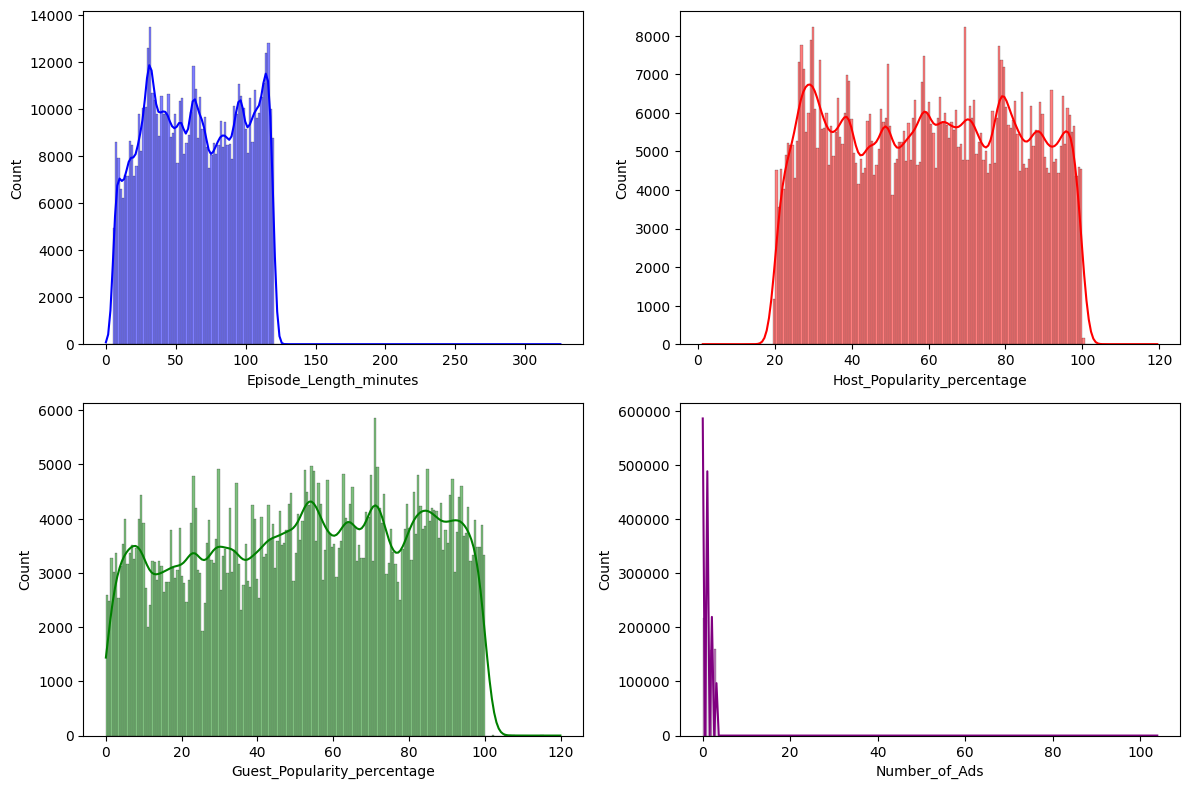

In [158]:
numerical_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
colors = ['blue','blue','red','green','purple']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[col].dropna(), bins=200, kde=True, color=colors[i])
plt.tight_layout()
plt.show()


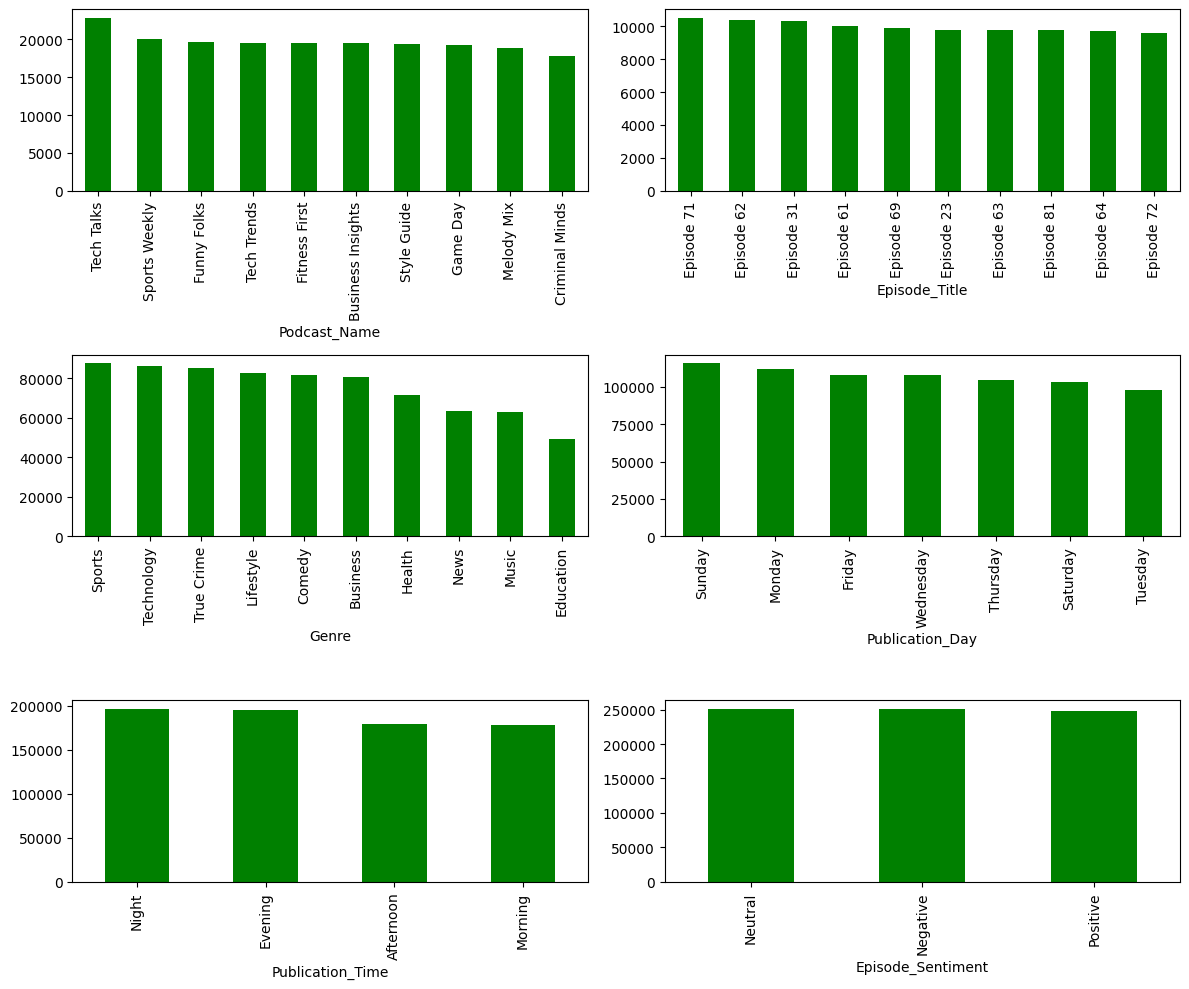

In [159]:
categorical_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    train_df[col].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.tight_layout()
plt.show()

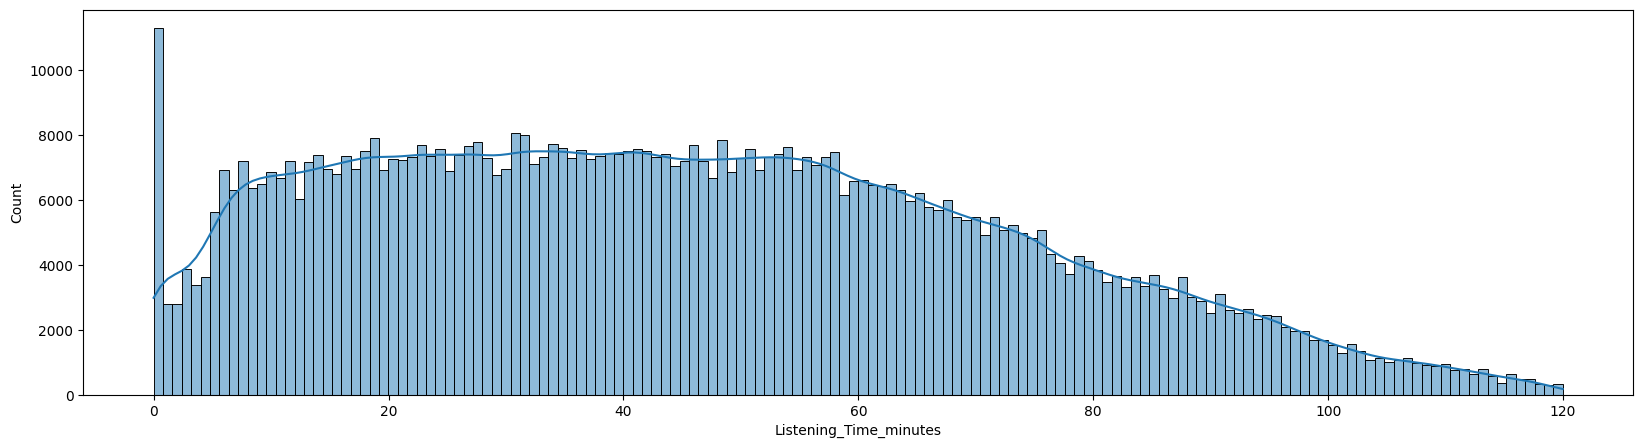

In [160]:
plt.figure(figsize=(20,5))
sns.histplot(train_df['Listening_Time_minutes'], bins=150, kde=True)
plt.show()

# Data Preprocessing

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [11]:
train_df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [12]:
train_df['Episode_Length_minutes'].fillna(train_df['Episode_Length_minutes'].median(), inplace=True)
train_df['Guest_Popularity_percentage'].fillna(train_df['Guest_Popularity_percentage'].median(), inplace=True)


C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\2968920367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Episode_Length_minutes'].fillna(train_df['Episode_Length_minutes'].median(), inplace=True)
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\2968920367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

In [13]:
train_df['Number_of_Ads'] = train_df['Number_of_Ads'].fillna(0).astype(int)
mode_val = train_df['Number_of_Ads'].mode()[0]
train_df['Number_of_Ads'] = train_df['Number_of_Ads'].fillna(mode_val).astype(int)

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64


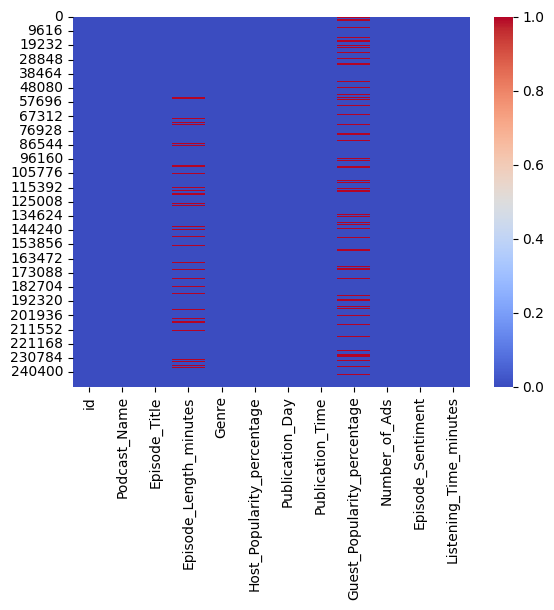

In [14]:
print(test_df1.isnull().sum())
sns.heatmap(test_df1.isnull(), cmap="coolwarm") 
plt.show()

In [15]:
test_df1['Episode_Length_minutes'].fillna(test_df1['Episode_Length_minutes'].median(), inplace=True)
test_df1['Guest_Popularity_percentage'].fillna(test_df1['Guest_Popularity_percentage'].median(), inplace=True)


C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\3200339411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df1['Episode_Length_minutes'].fillna(test_df1['Episode_Length_minutes'].median(), inplace=True)
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\3200339411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

In [16]:
test_df1['Number_of_Ads'] = test_df1['Number_of_Ads'].fillna(0).astype(int)
mode_val = test_df1['Number_of_Ads'].mode()[0]
test_df1['Number_of_Ads'] = test_df1['Number_of_Ads'].fillna(mode_val).astype(int)

In [17]:
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,53.58,0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,53.58,2,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0,Negative,100.72939


In [18]:
from itertools import combinations

In [19]:
train_df['Episode_Title'] = train_df['Episode_Title'].str.split(" ", expand=True)[1].astype(int)

In [20]:
train_df['Publication_Day'].replace({
    "Sunday": 0, 
    "Monday": 1, 
    "Tuesday": 2, 
    "Wednesday": 3, 
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6
}, inplace=True)

train_df['SinWeekDay'] = np.sin(2 * np.pi * train_df['Publication_Day'] / 7)
train_df['CosWeekDay'] = np.cos(2 * np.pi * train_df['Publication_Day'] / 7)

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\8142558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Publication_Day'].replace({
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\8142558.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Publication_

In [21]:
train_df['Publication_Time'].value_counts().sum

<bound method Series.sum of Publication_Time
Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: count, dtype: int64>

In [22]:
train_df['Publication_Time'].replace({
    "Morning": 0, 
    "Afternoon": 1, 
    "Evening": 2, 
    "Night": 3,
}, inplace=True)

train_df['SinTime'] = np.sin(2 * np.pi * train_df['Publication_Time'] / 4)
train_df['CosTime'] = np.cos(2 * np.pi * train_df['Publication_Time'] / 4)

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\668878634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Publication_Time'].replace({
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\668878634.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Publica

In [23]:
train_df['EpLen_Int'] = np.floor(train_df['Episode_Length_minutes'])
train_df['EpLen_Dec'] = train_df['Episode_Length_minutes'] - train_df['EpLen_Int']

In [24]:
train_df['SinEpLen'] = np.sin(2 * np.pi * train_df['Episode_Length_minutes'] / 60)
train_df['CosEpLen'] = np.cos(2 * np.pi * train_df['Episode_Length_minutes'] / 60)

In [25]:
train_df["Number_of_Ads"] = train_df["Number_of_Ads"].astype(str)

In [26]:
cat_cols = [
    "Podcast_Name", "Episode_Title", "Genre", "Number_of_Ads", "Episode_Sentiment", "EpLen_Int"
]
train_df[cat_cols] = train_df[cat_cols].astype("string")

for col1, col2 in combinations(cat_cols, 2) :
    train_df[f"{col1}-{col2}"] = train_df[col1] + "-" + train_df[col2]

In [27]:
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,...,Episode_Title-Genre,Episode_Title-Number_of_Ads,Episode_Title-Episode_Sentiment,Episode_Title-EpLen_Int,Genre-Number_of_Ads,Genre-Episode_Sentiment,Genre-EpLen_Int,Number_of_Ads-Episode_Sentiment,Number_of_Ads-EpLen_Int,Episode_Sentiment-EpLen_Int
0,0,Mystery Matters,98,63.84,True Crime,74.81,4,3,53.58,0,...,98-True Crime,98-0,98-Positive,98-63.0,True Crime-0,True Crime-Positive,True Crime-63.0,0-Positive,0-63.0,Positive-63.0
1,1,Joke Junction,26,119.80,Comedy,66.95,6,1,75.95,2,...,26-Comedy,26-2,26-Negative,26-119.0,Comedy-2,Comedy-Negative,Comedy-119.0,2-Negative,2-119.0,Negative-119.0
2,2,Study Sessions,16,73.90,Education,69.97,2,2,8.97,0,...,16-Education,16-0,16-Negative,16-73.0,Education-0,Education-Negative,Education-73.0,0-Negative,0-73.0,Negative-73.0
3,3,Digital Digest,45,67.17,Technology,57.22,1,0,78.70,2,...,45-Technology,45-2,45-Positive,45-67.0,Technology-2,Technology-Positive,Technology-67.0,2-Positive,2-67.0,Positive-67.0
4,4,Mind & Body,86,110.51,Health,80.07,1,1,58.68,3,...,86-Health,86-3,86-Neutral,86-110.0,Health-3,Health-Neutral,Health-110.0,3-Neutral,3-110.0,Neutral-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,25,75.66,Education,69.36,6,0,53.58,0,...,25-Education,25-0,25-Negative,25-75.0,Education-0,Education-Negative,Education-75.0,0-Negative,0-75.0,Negative-75.0
749996,749996,Business Briefs,21,75.75,Business,35.21,6,3,53.58,2,...,21-Business,21-2,21-Neutral,21-75.0,Business-2,Business-Neutral,Business-75.0,2-Neutral,2-75.0,Neutral-75.0
749997,749997,Lifestyle Lounge,51,30.98,Lifestyle,78.58,4,0,84.89,0,...,51-Lifestyle,51-0,51-Negative,51-30.0,Lifestyle-0,Lifestyle-Negative,Lifestyle-30.0,0-Negative,0-30.0,Negative-30.0
749998,749998,Style Guide,47,108.98,Lifestyle,45.39,4,0,93.27,0,...,47-Lifestyle,47-0,47-Negative,47-108.0,Lifestyle-0,Lifestyle-Negative,Lifestyle-108.0,0-Negative,0-108.0,Negative-108.0


Similarly Preprocessing for "test_df1" Data

In [28]:
test_df1['Episode_Title'] = test_df1['Episode_Title'].str.split(" ", expand=True)[1].astype(int)

test_df1['Publication_Day'].replace({
    "Sunday": 0, 
    "Monday": 1, 
    "Tuesday": 2, 
    "Wednesday": 3, 
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6
}, inplace=True)

test_df1['SinWeekDay'] = np.sin(2 * np.pi * test_df1['Publication_Day'] / 7)
test_df1['CosWeekDay'] = np.cos(2 * np.pi * test_df1['Publication_Day'] / 7)

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\2678746611.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df1['Publication_Day'].replace({
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\2678746611.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df1['Public

In [29]:
test_df1['Publication_Time'].replace({
    "Morning": 0, 
    "Afternoon": 1, 
    "Evening": 2, 
    "Night": 3,
}, inplace=True)

test_df1['SinTime'] = np.sin(2 * np.pi * test_df1['Publication_Time'] / 4)
test_df1['CosTime'] = np.cos(2 * np.pi * test_df1['Publication_Time'] / 4)

test_df1['EpLen_Int'] = np.floor(test_df1['Episode_Length_minutes'])
test_df1['EpLen_Dec'] = test_df1['Episode_Length_minutes'] - test_df1['EpLen_Int']


test_df1['SinEpLen'] = np.sin(2 * np.pi * test_df1['Episode_Length_minutes'] / 60)
test_df1['CosEpLen'] = np.cos(2 * np.pi * test_df1['Episode_Length_minutes'] / 60)

test_df1["Number_of_Ads"] = test_df1["Number_of_Ads"].astype(str)

cat_cols = [
    "Podcast_Name", "Episode_Title", "Genre", "Number_of_Ads", "Episode_Sentiment", "EpLen_Int"
]
test_df1[cat_cols] = test_df1[cat_cols].astype("string")

for col1, col2 in combinations(cat_cols, 2) :
    test_df1[f"{col1}-{col2}"] = test_df1[col1] + "-" + test_df1[col2]

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\2411516327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df1['Publication_Time'].replace({
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_11580\2411516327.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df1['Publi

In [30]:
print(train_df.info(), test_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               750000 non-null  int64  
 1   Podcast_Name                     750000 non-null  string 
 2   Episode_Title                    750000 non-null  string 
 3   Episode_Length_minutes           750000 non-null  float64
 4   Genre                            750000 non-null  string 
 5   Host_Popularity_percentage       750000 non-null  float64
 6   Publication_Day                  750000 non-null  int64  
 7   Publication_Time                 750000 non-null  int64  
 8   Guest_Popularity_percentage      750000 non-null  float64
 9   Number_of_Ads                    750000 non-null  string 
 10  Episode_Sentiment                750000 non-null  string 
 11  Listening_Time_minutes           750000 non-null  float64
 12  Si

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = train_df
test = test_df1
string_cols = [col for col in train.columns if train[col].dtype == 'string']
encoders = {}

for col in string_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    encoders[col] = le
for col in string_cols:
    if col in test.columns:
        le = encoders[col]
        test[col] = test[col].astype(str).map(
            lambda x: x if x in le.classes_ else '-1'
        ).map(
            {val: idx for idx, val in enumerate(np.append(le.classes_, '-1'))}
        ).astype(int)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               750000 non-null  int64  
 1   Podcast_Name                     750000 non-null  int32  
 2   Episode_Title                    750000 non-null  int32  
 3   Episode_Length_minutes           750000 non-null  float64
 4   Genre                            750000 non-null  int32  
 5   Host_Popularity_percentage       750000 non-null  float64
 6   Publication_Day                  750000 non-null  int64  
 7   Publication_Time                 750000 non-null  int64  
 8   Guest_Popularity_percentage      750000 non-null  float64
 9   Number_of_Ads                    750000 non-null  int32  
 10  Episode_Sentiment                750000 non-null  int32  
 11  Listening_Time_minutes           750000 non-null  float64
 12  Si

# Machine Learning Model

# Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
X = train.drop(columns=['id','Listening_Time_minutes'])
y = train['Listening_Time_minutes']

X_test = test.drop(columns=['id', 'Listening_Time_minutes'])

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=1024,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 921.1552 - mae: 21.8505 - val_loss: 190.2679 - val_mae: 10.4041
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 214.2719 - mae: 10.9104 - val_loss: 185.4048 - val_mae: 10.0822
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 205.3226 - mae: 10.6337 - val_loss: 181.7072 - val_mae: 9.9174
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 201.4421 - mae: 10.4946 - val_loss: 181.1306 - val_mae: 9.9043
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 199.0192 - mae: 10.4154 - val_loss: 178.1801 - val_mae: 9.8302
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 196.7216 - mae: 10.3354 - val_loss: 182.9888 - val_mae: 9.9284
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 195.6360 - mae: 10.3209 - val_loss: 178.2003 - val_mae: 9.8074
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 193.9250 - mae: 10.2638 - val_loss: 185.0150 - val_mae: 10.0744
Epoch

In [41]:
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {val_mae:.2f} minutes")

predictions = model.predict(X_test)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 176.5409 - mae: 9.7247
Validation MAE: 9.71 minutes
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [43]:
print(predictions)

[[56.775787 ]
 [17.219948 ]
 [51.637703 ]
 ...
 [ 5.8239307]
 [75.65984  ]
 [57.69547  ]]


# CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
import numpy as np

cat_features = [
    'Podcast_Name',
    'Episode_Title',
    'Genre',
    'Publication_Day',
    'Publication_Time',
    'Episode_Sentiment',
    'Podcast_Name-Episode_Title',
    'Podcast_Name-Genre',
    'Podcast_Name-Number_of_Ads',
    'Podcast_Name-Episode_Sentiment',
    'Podcast_Name-EpLen_Int',
    'Episode_Title-Genre',
    'Episode_Title-Number_of_Ads',
    'Episode_Title-Episode_Sentiment',
    'Episode_Title-EpLen_Int',
    'Genre-Number_of_Ads',
    'Genre-Episode_Sentiment',
    'Genre-EpLen_Int',
    'Number_of_Ads-Episode_Sentiment',
    'Number_of_Ads-EpLen_Int',
    'Episode_Sentiment-EpLen_Int'
]

target = 'Listening_Time_minutes'
features = [col for col in train_df.columns if col != target]

train_pool = Pool(data=train_df[features], label=train_df[target], cat_features=cat_features)
test_pool = Pool(data=test_df1[features], cat_features=cat_features)

model = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=100,
    random_seed=42
)

model.fit(train_pool)

0:	learn: 26.1268373	total: 986ms	remaining: 16m 25s
100:	learn: 13.1772387	total: 1m 39s	remaining: 14m 41s
200:	learn: 13.1156611	total: 3m 38s	remaining: 14m 26s
300:	learn: 13.0760232	total: 5m 6s	remaining: 11m 52s
400:	learn: 13.0478351	total: 6m 32s	remaining: 9m 46s
500:	learn: 13.0228098	total: 8m 3s	remaining: 8m 1s
600:	learn: 13.0021618	total: 9m 28s	remaining: 6m 17s
700:	learn: 12.9821580	total: 10m 53s	remaining: 4m 38s
800:	learn: 12.9655699	total: 12m 14s	remaining: 3m 2s
900:	learn: 12.9492741	total: 13m 39s	remaining: 1m 30s
999:	learn: 12.9345443	total: 14m 56s	remaining: 0us


In [ ]:
predictions = model.predict(test_pool)

In [47]:
predictions

array([54.48460119, 17.82440922, 49.89748821, ...,  5.93509306,
       73.52485747, 57.47430109])

In [49]:
submission = pd.DataFrame({
    'id': test_df1['id'].values,
    'Listening_Time_minutes': predictions})
submission.to_csv('submission.csv', index=False)